<a href="https://colab.research.google.com/github/KomalSikchi/Synapse_2025/blob/main/Synapse2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customize the dataset

In [10]:
import pandas as pd
import random

# List of Indian and Chinese foods
foods = [
    "Butter Naan", "Veg Hakka Noodles", "Dal Tadka", "Peanut Chikki", "Shrimp Fried Rice",
    "Gobi Manchurian", "Paneer Tikka", "Spring Rolls", "Momos", "Schezwan Fried Rice",
    "Palak Paneer", "Rasgulla", "Chilli Paneer", "Manchow Soup", "Chicken Biryani", "Fish Curry",
    "Masala Dosa", "Idli Sambar", "Dhokla", "Pav Bhaji", "Tandoori Chicken", "Chicken 65",
    "Malai Kofta", "Rajma Chawal", "Aloo Paratha", "Chow Mein", "Fried Wontons", "Peking Duck",
    "Mapo Tofu", "Kung Pao Chicken", "Sichuan Hot Pot"
]

# Mapping of food items to their typical ingredients
food_ingredients = {
    "Butter Naan": ["Wheat", "Milk", "Butter", "Yeast"],
    "Veg Hakka Noodles": ["Wheat", "Vegetables", "Soy Sauce"],
    "Dal Tadka": ["Lentils", "Tomatoes", "Onions", "Garlic"],
    "Peanut Chikki": ["Peanuts", "Jaggery"],
    "Shrimp Fried Rice": ["Rice", "Shrimp", "Eggs", "Vegetables"],
    "Gobi Manchurian": ["Cauliflower", "Cornflour", "Soy Sauce", "Garlic"],
    "Paneer Tikka": ["Paneer", "Yogurt", "Spices"],
    "Spring Rolls": ["Wheat", "Vegetables", "Soy Sauce"],
    "Momos": ["Wheat", "Vegetables", "Chicken"],
    "Schezwan Fried Rice": ["Rice", "Schezwan Sauce", "Vegetables"],
    "Palak Paneer": ["Spinach", "Paneer", "Cream"],
    "Rasgulla": ["Milk", "Sugar"],
    "Chilli Paneer": ["Paneer", "Capsicum", "Soy Sauce"],
    "Manchow Soup": ["Vegetables", "Soy Sauce", "Garlic"],
    "Chicken Biryani": ["Rice", "Chicken", "Spices"],
    "Fish Curry": ["Fish", "Coconut", "Spices"],
    "Masala Dosa": ["Rice", "Lentils", "Potatoes"],
    "Idli Sambar": ["Rice", "Lentils", "Vegetables"],
    "Dhokla": ["Chickpea Flour", "Yogurt"],
    "Pav Bhaji": ["Vegetables", "Butter", "Bread"],
    "Tandoori Chicken": ["Chicken", "Yogurt", "Spices"],
    "Chicken 65": ["Chicken", "Cornflour", "Spices"],
    "Malai Kofta": ["Paneer", "Cream", "Spices"],
    "Rajma Chawal": ["Kidney Beans", "Rice", "Spices"],
    "Aloo Paratha": ["Wheat", "Potatoes", "Spices"],
    "Chow Mein": ["Wheat", "Vegetables", "Soy Sauce"],
    "Fried Wontons": ["Wheat", "Vegetables", "Soy Sauce"],
    "Peking Duck": ["Duck", "Soy Sauce", "Hoisin Sauce"],
    "Mapo Tofu": ["Tofu", "Soy Sauce", "Sichuan Pepper"],
    "Kung Pao Chicken": ["Chicken", "Peanuts", "Soy Sauce"],
    "Sichuan Hot Pot": ["Beef", "Tofu", "Vegetables", "Sichuan Pepper"]
}

# Possible allergens and corresponding replacements
allergens_map = {
    "Milk": "Almond Milk, Cashew Cream, Soy Milk",
    "Wheat": "Gluten-Free Flour, Rice Flour",
    "Soy": "Coconut Aminos, Tamari Sauce",
    "Peanuts": "Sunflower Butter, Almond Butter",
    "Shellfish": "Mushrooms, Tofu",
    "Eggs": "Chia Seeds, Flaxseeds",
    "Gluten": "Gluten-Free Wrap, Rice Paper",
    "Tree Nuts": "Seeds (Sunflower, Pumpkin)"
}

# Generate 10,000 rows
data = []
for _ in range(10000):
    food = random.choice(foods)  # Randomly select food
    ingredients = food_ingredients[food]  # Get actual ingredients for the food

    # Ensure k does not exceed the number of ingredients
    k = random.randint(1, min(3, len(ingredients)))  # Adjust k to be within the range of available ingredients
    detected_allergens = ", ".join(random.sample(ingredients, k=k))  # Random allergens from actual ingredients

    risk_level = "High Risk" if k > 1 else "Medium Risk"

    # Generate personalized warnings
    warning = f"⚠️ {risk_level}: Contains {detected_allergens}. Avoid if allergic!"

    # Suggest alternative ingredients
    alternatives = ", ".join([allergens_map[allergen] for allergen in detected_allergens.split(", ") if allergen in allergens_map])

    # Append data
    data.append([food, ", ".join(ingredients), detected_allergens, risk_level, warning, alternatives])

# Create DataFrame
columns = ["Food Name", "Ingredients", "Detected Allergens", "Risk Level", "Notes", "Alternative Suggestions"]
df = pd.DataFrame(data, columns=columns)

# Save as CSV
df.to_csv("large_allergen_food_dataset.csv", index=False)

# Show sample output
print(df.head())

             Food Name                             Ingredients  \
0  Schezwan Fried Rice        Rice, Schezwan Sauce, Vegetables   
1      Sichuan Hot Pot  Beef, Tofu, Vegetables, Sichuan Pepper   
2    Veg Hakka Noodles            Wheat, Vegetables, Soy Sauce   
3            Pav Bhaji               Vegetables, Butter, Bread   
4    Shrimp Fried Rice          Rice, Shrimp, Eggs, Vegetables   

             Detected Allergens   Risk Level  \
0          Rice, Schezwan Sauce    High Risk   
1                    Vegetables  Medium Risk   
2  Wheat, Vegetables, Soy Sauce    High Risk   
3            Butter, Vegetables    High Risk   
4                    Rice, Eggs    High Risk   

                                               Notes  \
0  ⚠️ High Risk: Contains Rice, Schezwan Sauce. A...   
1  ⚠️ Medium Risk: Contains Vegetables. Avoid if ...   
2  ⚠️ High Risk: Contains Wheat, Vegetables, Soy ...   
3  ⚠️ High Risk: Contains Butter, Vegetables. Avo...   
4  ⚠️ High Risk: Contains Rice, Eg

In [11]:
print(df.columns)

Index(['Food Name', 'Ingredients', 'Detected Allergens', 'Risk Level', 'Notes',
       'Alternative Suggestions'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Food Name                10000 non-null  object
 1   Ingredients              10000 non-null  object
 2   Detected Allergens       10000 non-null  object
 3   Risk Level               10000 non-null  object
 4   Notes                    10000 non-null  object
 5   Alternative Suggestions  10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [13]:
print(df.isnull().sum())

Food Name                  0
Ingredients                0
Detected Allergens         0
Risk Level                 0
Notes                      0
Alternative Suggestions    0
dtype: int64


In [14]:
for column in df.columns:
  print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in Food Name: 31
Unique values in Ingredients: 28
Unique values in Detected Allergens: 436
Unique values in Risk Level: 2
Unique values in Notes: 436
Unique values in Alternative Suggestions: 7


1.Risk Level Detection

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sentence_transformers import SentenceTransformer


In [16]:
df = pd.read_csv('/content/large_allergen_food_dataset.csv')  # or load from a DataFrame if already present

# Display a few rows
df[['Ingredients', 'Risk Level']].head()


,Ingredients,Risk Level
0,"Rice, Schezwan Sauce, Vegetables",High Risk
1,"Beef, Tofu, Vegetables, Sichuan Pepper",Medium Risk
2,"Wheat, Vegetables, Soy Sauce",High Risk
3,"Vegetables, Butter, Bread",High Risk
4,"Rice, Shrimp, Eggs, Vegetables",High Risk


In [17]:
# Optional: Lowercase ingredients
df['Ingredients'] = df['Ingredients'].str.lower()


In [18]:
le = LabelEncoder()
y = le.fit_transform(df['Risk Level'])

# You can map back using: le.inverse_transform([0, 1, 2])


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

risk_vectorizer = TfidfVectorizer()
X = risk_vectorizer.fit_transform(df["Ingredients"])


# 3. Now use X_encoded for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
risk_model = RandomForestClassifier()
risk_model.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
y_pred = risk_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.631

Classification Report:
               precision    recall  f1-score   support

   High Risk       0.63      0.98      0.77      1262
 Medium Risk       0.50      0.04      0.07       738

    accuracy                           0.63      2000
   macro avg       0.57      0.51      0.42      2000
weighted avg       0.58      0.63      0.51      2000



In [22]:
import joblib

joblib.dump(risk_vectorizer,"risk_vectorizer.pkl")
joblib.dump(risk_model,"risk_model.pkl")

risk_vectorizer = joblib.load("risk_vectorizer.pkl")
risk_model = joblib.load("risk_model.pkl")

In [23]:
def predict_risk_level(ingredients):
    vec = risk_vectorizer.transform([ingredients])
    risk = risk_model.predict(vec)[0]
    return risk

2.Allergend Detection

In [62]:
!pip install scikit-multilearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 7.9 MB/s eta 0:00:00


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer


In [24]:
df = pd.read_csv("/content/large_allergen_food_dataset.csv")  
df = df.dropna(subset=['Ingredients', 'Detected Allergens'])

# Convert allergens to list format
df['Detected Allergens'] = df['Detected Allergens'].apply(lambda x: [i.strip().lower() for i in x.split(',')])


In [25]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Detected Allergens'])

# Print all allergen classes
print("Possible Allergens:", mlb.classes_)


Possible Allergens: ['beef' 'bread' 'butter' 'capsicum' 'cauliflower' 'chicken'
 'chickpea flour' 'coconut' 'cornflour' 'cream' 'duck' 'eggs' 'fish'
 'garlic' 'hoisin sauce' 'jaggery' 'kidney beans' 'lentils' 'milk'
 'onions' 'paneer' 'peanuts' 'potatoes' 'rice' 'schezwan sauce' 'shrimp'
 'sichuan pepper' 'soy sauce' 'spices' 'spinach' 'sugar' 'tofu' 'tomatoes'
 'vegetables' 'wheat' 'yeast' 'yogurt']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

allergen_vectorizer = TfidfVectorizer()
X = allergen_vectorizer.fit_transform(df["Ingredients"])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.multioutput import MultiOutputClassifier

allergen_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))
allergen_model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier())

In [29]:
y_pred = allergen_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=mlb.classes_))


                precision    recall  f1-score   support

          beef       0.00      0.00      0.00        24
         bread       0.67      1.00      0.80        42
        butter       0.62      1.00      0.76        77
      capsicum       0.59      1.00      0.75        41
   cauliflower       0.00      0.00      0.00        28
       chicken       0.67      1.00      0.80       227
chickpea flour       0.86      1.00      0.93        51
       coconut       0.62      1.00      0.76        39
     cornflour       0.50      1.00      0.66        55
         cream       0.70      1.00      0.82        82
          duck       0.70      1.00      0.82        51
          eggs       0.51      1.00      0.67        32
          fish       0.68      1.00      0.81        43
        garlic       0.60      0.70      0.64       102
  hoisin sauce       0.63      1.00      0.77        46
       jaggery       0.75      1.00      0.86        45
  kidney beans       0.68      1.00      0.81  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
import joblib
joblib.dump(allergen_model, "allergen_model.pkl")
joblib.dump(allergen_vectorizer, "allergen_vectorizer.pkl")
joblib.dump(mlb, "mlb.pkl")

allergen_model = joblib.load("allergen_model.pkl")
allergen_vectorizer = joblib.load("allergen_vectorizer.pkl")
mlb = joblib.load("mlb.pkl")

In [33]:
new_text = "sugar, milk powder, wheat flour, soy lecithin"
new_vec = allergen_vectorizer.transform([new_text])

pred = allergen_model.predict(new_vec)
predicted_allergens = mlb.inverse_transform(pred)

print("Predicted Allergens:", predicted_allergens[0])


Predicted Allergens: ('milk',)


In [31]:
def detect_allergens_from_ingredients(ingredients):
    # Encode the ingredient text using the trained encoder (e.g., SentenceTransformer, TF-IDF)
    ingredients_vec = allergen_vectorizer.transform([ingredients])

    # Predict allergen presence (multi-label binary classification)
    predicted = allergen_model.predict(ingredients_vec)

    # Decode the predicted labels into allergen names
    predicted_allergens = mlb.inverse_transform(pred)

    return list(predicted_allergens[0]) if predicted_allergens else []

3.Suggest suitable alternatives

In [32]:
allergen_alternatives = {
    'milk': ['almond milk', 'soy milk', 'oat milk'],
    'egg': ['chia seeds', 'flaxseed meal + water', 'banana'],
    'wheat': ['rice flour', 'almond flour', 'quinoa'],
    'peanuts': ['sunflower seed butter', 'almond butter'],
    'soy': ['coconut aminos', 'tamari'],
    'gluten': ['corn flour', 'rice flour'],
    'fish': ['tofu', 'jackfruit'],
    'shellfish': ['chicken', 'tofu'],
}


In [34]:
def suggest_alternatives(detected_allergens, alt_dict):
    suggestions = {}
    for allergen in detected_allergens:
        if allergen in alt_dict:
            suggestions[allergen] = alt_dict[allergen]
        else:
            suggestions[allergen] = ["No known alternatives"]
    return suggestions


In [35]:
detected_allergens = ['milk', 'wheat']
alt_suggestions = suggest_alternatives(detected_allergens, allergen_alternatives)

for allergen, suggestions in alt_suggestions.items():
    print(f"Allergen: {allergen} → Alternatives: {', '.join(suggestions)}")


Allergen: milk → Alternatives: almond milk, soy milk, oat milk
Allergen: wheat → Alternatives: rice flour, almond flour, quinoa


In [36]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')
alt_keys = list(allergen_alternatives.keys())
alt_embeddings = model.encode(alt_keys)

def get_closest_allergen(allergen_name):
    query_emb = model.encode([allergen_name])
    scores = util.cos_sim(query_emb, alt_embeddings)[0]
    best_idx = scores.argmax()
    return alt_keys[best_idx]

allergen_name = "milk powder"
closest_allergen = get_closest_allergen(allergen_name)
print(f"Closest allergen to '{allergen_name}': '{closest_allergen}'")

suggest_alternatives([closest_allergen], allergen_alternatives)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Closest allergen to 'milk powder': 'milk'


{'milk': ['almond milk', 'soy milk', 'oat milk']}

4.Clustering similar ingredients

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your data
df = pd.read_csv("/content/large_allergen_food_dataset.csv")  # or DataFrame already in use

# Basic cleaning (optional)
df['Ingredients'] = df['Ingredients'].str.lower().str.replace('[^a-zA-Z, ]', '', regex=True)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Ingredients'])


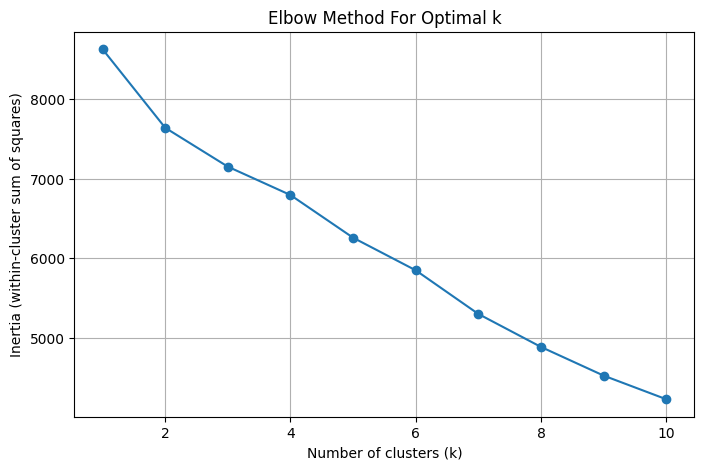

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3: Elbow method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)  # Sum of squared distances to nearest cluster center

# Step 4: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.grid(True)
plt.show()


In [39]:
from sklearn.cluster import KMeans

k = 7  # Number of clusters (tune this based on your data)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [40]:
for i in range(k):
    print(f"\nCluster {i}")
    print(df[df['Cluster'] == i]['Food Name'].head(5))



Cluster 0
9       Fish Curry
16    Aloo Paratha
20    Rajma Chawal
21    Rajma Chawal
25    Rajma Chawal
Name: Food Name, dtype: object

Cluster 1
2     Veg Hakka Noodles
6                 Momos
7       Gobi Manchurian
8          Spring Rolls
12        Chilli Paneer
Name: Food Name, dtype: object

Cluster 2
3        Pav Bhaji
22       Pav Bhaji
43     Butter Naan
83     Butter Naan
123    Butter Naan
Name: Food Name, dtype: object

Cluster 3
11    Dal Tadka
18    Dal Tadka
39    Dal Tadka
56    Dal Tadka
74    Dal Tadka
Name: Food Name, dtype: object

Cluster 4
10    Paneer Tikka
13    Palak Paneer
15    Palak Paneer
23     Malai Kofta
29    Palak Paneer
Name: Food Name, dtype: object

Cluster 5
0     Schezwan Fried Rice
4       Shrimp Fried Rice
14      Shrimp Fried Rice
17    Schezwan Fried Rice
19            Idli Sambar
Name: Food Name, dtype: object

Cluster 6
1      Sichuan Hot Pot
5            Mapo Tofu
41           Mapo Tofu
208    Sichuan Hot Pot
257    Sichuan Hot Pot
Name: F

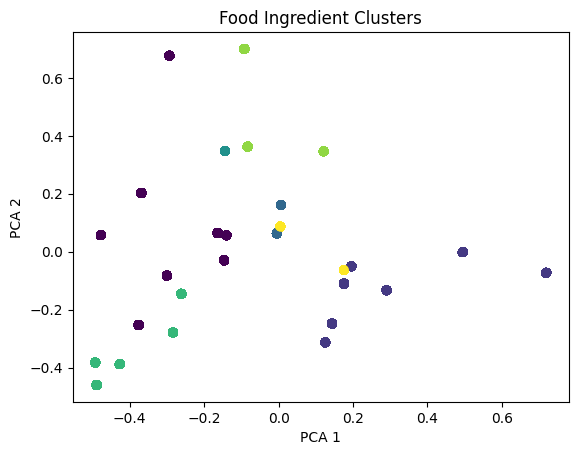

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

reduced = PCA(n_components=2).fit_transform(X.toarray())
plt.scatter(reduced[:,0], reduced[:,1], c=df['Cluster'])
plt.title("Food Ingredient Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [43]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

ingredient_embeddings = model.encode(df['Ingredients'].tolist())
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(ingredient_embeddings)


In [44]:
df.head()

,Food Name,Ingredients,Detected Allergens,Risk Level,Notes,Alternative Suggestions,Cluster
0,Schezwan Fried Rice,"rice, schezwan sauce, vegetables","Rice, Schezwan Sauce",High Risk,"⚠️ High Risk: Contains Rice, Schezwan Sauce. A...",NaN,1
1,Sichuan Hot Pot,"beef, tofu, vegetables, sichuan pepper",Vegetables,Medium Risk,⚠️ Medium Risk: Contains Vegetables. Avoid if ...,NaN,3
2,Veg Hakka Noodles,"wheat, vegetables, soy sauce","Wheat, Vegetables, Soy Sauce",High Risk,"⚠️ High Risk: Contains Wheat, Vegetables, Soy ...","Gluten-Free Flour, Rice Flour",1
3,Pav Bhaji,"vegetables, butter, bread","Butter, Vegetables",High Risk,"⚠️ High Risk: Contains Butter, Vegetables. Avo...",NaN,6
4,Shrimp Fried Rice,"rice, shrimp, eggs, vegetables","Rice, Eggs",High Risk,"⚠️ High Risk: Contains Rice, Eggs. Avoid if al...","Chia Seeds, Flaxseeds",6


To fetch the information from barcode

In [45]:
import requests

def fetch_data_from_barcode(barcode):
    url = f"https://world.openfoodfacts.org/api/v0/product/{barcode}.json"
    response = requests.get(url)
    data = response.json()

    if data['status'] == 1:
        product = data['product']
        food_name = product.get('product_name', 'Unknown')
        ingredients = product.get('ingredients_text', '')
        allergens = product.get('allergens_tags', [])  # List like ['en:milk', 'en:soy']

        # Clean allergen tags
        allergens = [a.replace('en:', '') for a in allergens]

        return food_name, ingredients, allergens
    else:
        raise Exception("Product not found.")


To fetch the information from image

In [46]:
!sudo apt install tesseract-ocr
!pip install pytesseract pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [48]:
from PIL import Image
import pytesseract

In [47]:
def extract_ingredients_from_image(image_path):
    # Load the image
    img = Image.open(image_path)

    # Use pytesseract to extract text
    extracted_text = pytesseract.image_to_string(img)

    # Optional cleanup
    ingredients = extracted_text.replace('\n', ' ').strip()

    return ingredients


In [49]:
def main():
    print("==== Allergy Detection & Food Safety System ====")
    while True:
      choice = input("Choose input method:\n1. Barcode\n2. Manually Enter Ingredients\n3.Enter the image of ingredients\n4. Exit\nEnter your choice: ")

      if choice == '1':
          barcode = input("Enter the barcode number: ")
          try:
              food_name, ingredients, allergens = fetch_data_from_barcode(barcode)
              print(f"Product: {food_name}")
              print(f"Ingredients: {ingredients}")
              print(f"Detected Allergens: {', '.join(allergens) if allergens else 'None'}")
          except:
              print("Failed to fetch data for the given barcode.")
              return
          # Predict Risk Level
          risk = predict_risk_level(ingredients)
          print(f"\nRisk Level: {risk}")

          # Suggest Alternatives
          alternatives = suggest_alternatives(allergens, allergen_alternatives)
          print("\nSuggested Alternatives:")
          if alternatives:
              for allergen, subs in alternatives.items():
                  print(f"- {allergen}: {', '.join(subs)}")
          else:
            print("No specific alternatives found.")
          print("\n---------------------------------------------------------------\n")

      elif choice == '2':
          ingredients = input("Enter ingredients (comma-separated): ")
          allergens = detect_allergens_from_ingredients(ingredients)
          print(f"\nDetected Allergens: {', '.join(allergens) if allergens else 'None'}")
           # Predict Risk Level
          risk = predict_risk_level(ingredients)
          print(f"\nRisk Level: {risk}")

          # Suggest Alternatives
          alternatives = suggest_alternatives(allergens, allergen_alternatives)
          print("\nSuggested Alternatives:")
          if alternatives:
              for allergen, subs in alternatives.items():
                  print(f"- {allergen}: {', '.join(subs)}")
          else:
              print("No specific alternatives found.")
          print("\n---------------------------------------------------------------\n")

      elif choice=='3':
        from google.colab import files

        uploaded = files.upload()
        image_path = next(iter(uploaded))  # Get the uploaded file name

        ingredients = extract_ingredients_from_image(image_path)
        print("Extracted Ingredients:", ingredients)

        allergens = detect_allergens_from_ingredients(ingredients)
        print(f"\nDetected Allergens: {', '.join(allergens) if allergens else 'None'}")
          # Predict Risk Level
        risk = predict_risk_level(ingredients)
        print(f"\nRisk Level: {risk}")

        # Suggest Alternatives
        alternatives = suggest_alternatives(allergens, allergen_alternatives)
        print("\nSuggested Alternatives:")
        if alternatives:
            for allergen, subs in alternatives.items():
                print(f"- {allergen}: {', '.join(subs)}")
        else:
            print("No specific alternatives found.")
        print("\n---------------------------------------------------------------\n")

      elif choice=='4':
        break

      else:
          print("Invalid input")
          return

if __name__ == "__main__":
    main()

==== Allergy Detection & Food Safety System ====
Choose input method:
1. Barcode
2. Manually Enter Ingredients
3.Enter the image of ingredients
4. Exit
Enter your choice: 3


Saving Screenshot 2025-05-02 190832.png to Screenshot 2025-05-02 190832 (2).png
Extracted Ingredients: Ingredients: Dextrose, fructose, honey, invert sugar, raw sugar, malt syrup, rice syrup, sucrose, xylose, molasses, corn sweetener, fruit juice concentrate, high-fructose corn syrup, brown sugar, corn syrup, glucose, lactose, maltose, sucrose, evaporated cane juice, agave nectar, cane crystals, cane sugar, crystal- line fructose, barley malt, beet sugar, caramel.

Detected Allergens: milk

Risk Level: 0

Suggested Alternatives:
- milk: almond milk, soy milk, oat milk

---------------------------------------------------------------

Choose input method:
1. Barcode
2. Manually Enter Ingredients
3.Enter the image of ingredients
4. Exit
Enter your choice: 4
